In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading the data 
df = pd.read_csv('DataSet_PCP_Change.csv')
df.head()

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
0,0,0,0.071912,0,NaN,2.0,0,0,0,0,0,1,0,0
1,2,0,0.448447,0,NaN,1.0,0,0,1,1,1,0,0,0
2,5,0,0.345793,0,NaN,1.0,0,1,0,0,0,1,0,0
3,6,0,1.857032,0,NaN,1.0,0,0,1,1,1,1,0,0
4,7,1,7.222060,0,NaN,1.0,0,0,1,1,0,0,0,0


In [3]:
#Preprocessing the data which can create conflict in the data set in modelling
df.claims_daysaway.fillna(-1, inplace = True)
df.head()

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
0,0,0,0.071912,0,-1.0,2.0,0,0,0,0,0,1,0,0
1,2,0,0.448447,0,-1.0,1.0,0,0,1,1,1,0,0,0
2,5,0,0.345793,0,-1.0,1.0,0,1,0,0,0,1,0,0
3,6,0,1.857032,0,-1.0,1.0,0,0,1,1,1,1,0,0
4,7,1,7.222060,0,-1.0,1.0,0,0,1,1,0,0,0,0


In [4]:
#After handling the claims days by preprocessing the data, checking the count by doing the grouping
df.groupby('claims_daysaway')['outcome'].value_counts()

claims_daysaway  outcome
-1.0             0          2493
                 1            81
 0.0             1             1
 1.0             0             2
                 1             2
                            ... 
 571.0           0             1
 589.0           0             2
 618.0           0             1
 620.0           0             1
 736.0           0             1
Name: outcome, Length: 301, dtype: int64

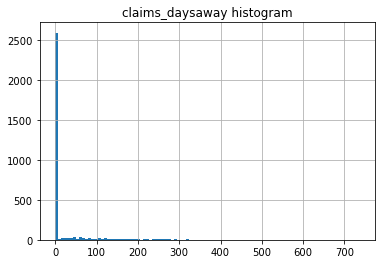

In [5]:
#Checking histogram of claims days away
plt.title("claims_daysaway histogram")
df.claims_daysaway.hist(bins = 100)

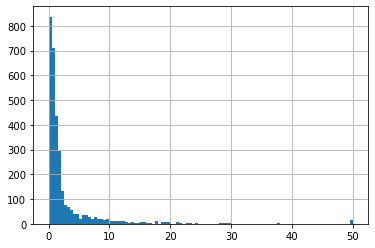

In [6]:
df.distance.hist(bins = 100)

In [7]:
conditions = [
    (df['claims_daysaway'] < 0),
    (df['claims_daysaway'] >= 0) & (df['claims_daysaway'] <= 50),
    (df['claims_daysaway'] > 50) & (df['claims_daysaway'] <= 100),
    (df['claims_daysaway'] > 100) & (df['claims_daysaway'] <= 200),
    (df['claims_daysaway'] > 200)
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
df['claims_daysaway_new'] = np.select(conditions, values)

In [8]:
conditions = [
    (df['distance'] <= 2),
    (df['distance'] > 2) & (df['distance'] <= 3),
    (df['distance'] > 3) & (df['distance'] <= 5),
    (df['distance'] > 5) & (df['distance'] <= 10),
    (df['distance'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
df['distance_new'] = np.select(conditions, values)

In [9]:
df.groupby('distance_new')['outcome'].value_counts()

distance_new  outcome
1             0          2220
              1            61
2             0           195
              1            13
3             0           193
              1            12
4             0           215
              1            24
5             0           180
              1            17
Name: outcome, dtype: int64

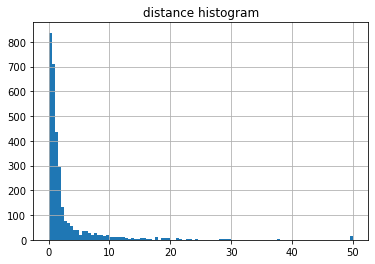

In [10]:
plt.title("distance histogram")
df.distance.hist(bins = 100)

In [11]:
df.shape

(3130, 16)

In [12]:
df.isnull().sum()

testindex              0
outcome                0
distance               0
visit_count            0
claims_daysaway        0
tier                   9
fqhc                   0
pcp_lookback           0
family_assignment      0
kid                    0
is_ped                 0
same_gender            0
same_language          0
same_address           0
claims_daysaway_new    0
distance_new           0
dtype: int64

In [13]:
df.outcome.value_counts()

0    3003
1     127
Name: outcome, dtype: int64

In [14]:
df = df[~df['tier'].isnull()]
df.corr()

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address,claims_daysaway_new,distance_new
testindex,1.000000,-0.032365,0.005695,-0.008622,0.004946,0.010348,0.012255,0.009065,-0.003563,0.002892,0.006909,-0.011196,-0.016755,0.036464,0.004140,0.013319
outcome,-0.032365,1.000000,0.086238,0.061962,0.024026,0.012041,-0.034259,-0.087557,0.009892,0.048355,0.001411,-0.001674,-0.033919,0.084066,0.050677,0.119003
distance,0.005695,0.086238,1.000000,0.047251,0.039983,0.038737,-0.066076,0.155473,0.025209,0.034724,-0.001982,0.025091,-0.030741,-0.004024,0.054665,0.776452
visit_count,-0.008622,0.061962,0.047251,1.000000,0.436686,0.053896,-0.105532,0.227089,0.111685,0.097195,0.081203,0.031244,-0.009967,0.015475,0.612809,0.096332
claims_daysaway,0.004946,0.024026,0.039983,0.436686,1.000000,0.044423,-0.085898,0.238455,0.093118,0.056957,0.040746,0.001857,-0.013964,0.034920,0.899042,0.100769
tier,0.010348,0.012041,0.038737,0.053896,0.044423,1.000000,-0.151099,0.077143,0.014159,-0.015763,-0.027501,0.012893,-0.045776,0.053311,0.065902,0.074757
fqhc,0.012255,-0.034259,-0.066076,-0.105532,-0.085898,-0.151099,1.000000,-0.118027,-0.078739,-0.039217,-0.042995,0.007744,0.037150,0.051421,-0.109007,-0.106281
pcp_lookback,0.009065,-0.087557,0.155473,0.227089,0.238455,0.077143,-0.118027,1.000000,0.088070,0.091399,0.080585,0.018610,-0.018070,0.101270,0.295641,0.209405
family_assignment,-0.003563,0.009892,0.025209,0.111685,0.093118,0.014159,-0.078739,0.088070,1.000000,0.315568,0.295534,-0.026795,0.033615,0.008720,0.138363,0.028548
kid,0.002892,0.048355,0.034724,0.097195,0.056957,-0.015763,-0.039217,0.091399,0.315568,1.000000,0.878120,-0.018068,-0.015967,-0.021561,0.091556,0.021934


In [15]:
df.shape

(3121, 16)

In [16]:
df.head()

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address,claims_daysaway_new,distance_new
0,0,0,0.071912,0,-1.0,2.0,0,0,0,0,0,1,0,0,1,1
1,2,0,0.448447,0,-1.0,1.0,0,0,1,1,1,0,0,0,1,1
2,5,0,0.345793,0,-1.0,1.0,0,1,0,0,0,1,0,0,1,1
3,6,0,1.857032,0,-1.0,1.0,0,0,1,1,1,1,0,0,1,1
4,7,1,7.222060,0,-1.0,1.0,0,0,1,1,0,0,0,0,1,4


In [17]:
visit_fe = df.groupby('visit_count').size()/ len(df) 
df.loc[:, 'visit_count_fe'] = df['visit_count'].map(visit_fe)

fqhc_fe = df.groupby('fqhc').size()/ len(df) 
df.loc[:, 'fqhc_fe'] = df['fqhc'].map(fqhc_fe)

pcp_lookback_fe = df.groupby('pcp_lookback').size()/ len(df) 
df.loc[:, 'pcp_lookback_fe'] = df['pcp_lookback'].map(pcp_lookback_fe)

family_assignment_fe = df.groupby('family_assignment').size()/ len(df) 
df.loc[:, 'family_assignment_fe'] = df['family_assignment'].map(family_assignment_fe)

kid_fe = df.groupby('kid').size()/ len(df) 
df.loc[:, 'kid_fe'] = df['kid'].map(kid_fe)

is_ped_fe = df.groupby('is_ped').size()/ len(df) 
df.loc[:, 'is_ped_fe'] = df['is_ped'].map(is_ped_fe)

same_gender_fe = df.groupby('same_gender').size()/ len(df) 
df.loc[:, 'same_gender_fe'] = df['same_gender'].map(same_gender_fe)

same_language_fe = df.groupby('same_language').size()/ len(df) 
df.loc[:, 'same_language_fe'] = df['same_language'].map(same_language_fe)

same_address_fe = df.groupby('same_address').size()/ len(df) 
df.loc[:, 'same_address_fe'] = df['same_address'].map(same_address_fe)



In [18]:
df

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,...,distance_new,visit_count_fe,fqhc_fe,pcp_lookback_fe,family_assignment_fe,kid_fe,is_ped_fe,same_gender_fe,same_language_fe,same_address_fe
0,0,0,0.071912,0,-1.0,2.0,0,0,0,0,...,1,0.822813,0.807113,0.557834,0.657802,0.622236,0.606536,0.512015,0.935598,0.934636
1,2,0,0.448447,0,-1.0,1.0,0,0,1,1,...,1,0.822813,0.807113,0.557834,0.342198,0.377764,0.393464,0.487985,0.935598,0.934636
2,5,0,0.345793,0,-1.0,1.0,0,1,0,0,...,1,0.822813,0.807113,0.442166,0.657802,0.622236,0.606536,0.512015,0.935598,0.934636
3,6,0,1.857032,0,-1.0,1.0,0,0,1,1,...,1,0.822813,0.807113,0.557834,0.342198,0.377764,0.393464,0.512015,0.935598,0.934636
4,7,1,7.222060,0,-1.0,1.0,0,0,1,1,...,4,0.822813,0.807113,0.557834,0.342198,0.377764,0.606536,0.487985,0.935598,0.934636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,4994,0,1.447149,0,-1.0,3.0,0,1,0,0,...,1,0.822813,0.807113,0.442166,0.657802,0.622236,0.606536,0.512015,0.935598,0.065364
3126,4997,0,4.764236,12,51.0,1.0,0,1,0,1,...,3,0.004165,0.807113,0.442166,0.657802,0.377764,0.393464,0.512015,0.935598,0.934636
3127,4998,0,2.796333,15,121.0,1.0,0,0,0,0,...,2,0.003204,0.807113,0.557834,0.657802,0.622236,0.606536,0.512015,0.935598,0.934636
3128,4999,0,0.641309,0,-1.0,1.0,1,0,1,1,...,1,0.822813,0.192887,0.557834,0.342198,0.377764,0.393464,0.487985,0.935598,0.934636


In [19]:
x = df.iloc[:, 14:]
x['tier'] = 5 - df[['tier']]
x

,claims_daysaway_new,distance_new,visit_count_fe,fqhc_fe,pcp_lookback_fe,family_assignment_fe,kid_fe,is_ped_fe,same_gender_fe,same_language_fe,same_address_fe,tier
0,1,1,0.822813,0.807113,0.557834,0.657802,0.622236,0.606536,0.512015,0.935598,0.934636,3.0
1,1,1,0.822813,0.807113,0.557834,0.342198,0.377764,0.393464,0.487985,0.935598,0.934636,4.0
2,1,1,0.822813,0.807113,0.442166,0.657802,0.622236,0.606536,0.512015,0.935598,0.934636,4.0
3,1,1,0.822813,0.807113,0.557834,0.342198,0.377764,0.393464,0.512015,0.935598,0.934636,4.0
4,1,4,0.822813,0.807113,0.557834,0.342198,0.377764,0.606536,0.487985,0.935598,0.934636,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3125,1,1,0.822813,0.807113,0.442166,0.657802,0.622236,0.606536,0.512015,0.935598,0.065364,2.0
3126,3,3,0.004165,0.807113,0.442166,0.657802,0.377764,0.393464,0.512015,0.935598,0.934636,4.0
3127,4,2,0.003204,0.807113,0.557834,0.657802,0.622236,0.606536,0.512015,0.935598,0.934636,4.0
3128,1,1,0.822813,0.192887,0.557834,0.342198,0.377764,0.393464,0.487985,0.935598,0.934636,4.0


In [20]:
y = df.loc[:, 'outcome']
y

0       0
1       0
2       0
3       0
4       1
       ..
3125    0
3126    0
3127    0
3128    0
3129    0
Name: outcome, Length: 3121, dtype: int64

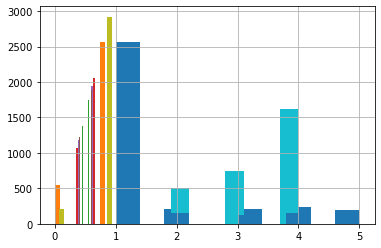

In [21]:
#Data Exploration using histogram
x.distance_new.hist(bins=10)
x.visit_count_fe.hist(bins=10)
x.pcp_lookback_fe.hist(bins=10)

x.family_assignment_fe.hist(bins=10)
x.kid_fe.hist(bins=10)
x.is_ped_fe.hist(bins=10)

x.same_gender_fe.hist(bins=10)
x.same_language_fe.hist(bins=10)
x.same_address_fe.hist(bins=10)

x.tier.hist(bins=10)
x.claims_daysaway_new.hist(bins=10)

In [22]:
list(x.iloc[4,:])

[1.0,
 4.0,
 0.8228132008971484,
 0.8071131047741109,
 0.5578340275552708,
 0.3421980134572252,
 0.37776353732777956,
 0.606536366549183,
 0.4879846203140019,
 0.9355975648830503,
 0.9346363345081704,
 4.0]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
clf = RandomForestClassifier(n_estimators=300, max_features = 0.4, random_state = 42, class_weight={0:1,1:15})

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

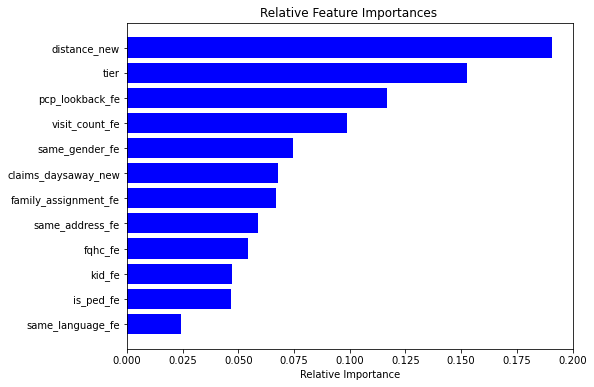

In [25]:
#Generate relative feature importance 
features=X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8,6))
plt.title('Relative Feature Importances ')
plt.barh(range(len(indices[-30:])), importances[indices[-30:]], color='b', align='center')
plt.yticks(range(len(indices[-30:])), features[indices[-30:]])
plt.xlabel('Relative Importance');

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9413020277481323


In [27]:
#Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       901
           1       0.19      0.17      0.18        36

    accuracy                           0.94       937
   macro avg       0.58      0.57      0.57       937
weighted avg       0.94      0.94      0.94       937



In [28]:
#Generating confusion matrix
confusion_matrix(y_test, y_pred)

array([[876,  25],
       [ 30,   6]], dtype=int64)

In [29]:
#Checking outcome values
df.outcome.value_counts()

0    2995
1     126
Name: outcome, dtype: int64

In [30]:
#outcome counts
y_test.value_counts()

0    901
1     36
Name: outcome, dtype: int64